In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

>first we read the train data set 

In [2]:
data = pd.read_csv("fashion-mnist_train.csv") #reading the train data

>separating X and y of train data set

In [3]:
X_train = data.iloc[:, 1:] #all columns exept first one
y_train = data['label'] #last column with all rows (the answer column)

In [4]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


>then we do the same things for test data set and store it to X_test and y_test

In [5]:
import pandas as pd
data = pd.read_csv("fashion-mnist_test.csv") #reading the test data

In [6]:
X_test = data.iloc[:, 1:] #all columns exept first one
y_test = data['label'] #last column with all rows (the answer column)

In [7]:
X_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


>here we normalize the data set (after normalization, mean will be equal to zero)

In [8]:
mean_X_train = X_train.mean(axis = 0)
X_train = X_train - np.reshape(np.array(mean_X_train), (1, 784))

mean_X_test = X_test.mean(axis = 0)
X_test = X_test - np.reshape(np.array(mean_X_test), (1, 784))

X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,-34.6254,-23.300683,-16.588267,-17.869433,-22.814817,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
1,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,-34.6254,-23.300683,-16.588267,-17.869433,-22.814817,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
2,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,2.801717,-5.682,-14.488767,...,-34.6254,-23.300683,-16.588267,12.130567,20.185183,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
3,-0.0009,-0.00615,-0.035333,0.898067,1.752033,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,-31.6254,-23.300683,-16.588267,-17.869433,-22.814817,-16.911483,-8.520633,-2.7533,-0.855517,-0.07025
4,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,-34.6254,-23.300683,-16.588267,-17.869433,-22.814817,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,-34.6254,-23.300683,-16.588267,-17.869433,-22.814817,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
59996,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,38.3746,-23.300683,-16.588267,-17.869433,-22.814817,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
59997,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,125.3746,138.699317,146.411733,117.130567,71.185183,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025
59998,-0.0009,-0.00615,-0.035333,-0.101933,-0.247967,-0.411467,-0.805767,-2.198283,-5.682,-14.488767,...,-34.6254,-23.300683,-16.588267,-17.869433,-22.814817,-17.911483,-8.520633,-2.7533,-0.855517,-0.07025


>calculating covariance of the X_train data set
>$$ covarince \: of \: a \: matrix = martix^Tmatrix/(n-1),\: matrix \in R_{n*n}$$

In [9]:
X_cov = (np.transpose(X_train) @ X_train)/(X_train.shape[0]-1)

In [10]:
X_cov

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
pixel1,0.008966,0.007645,0.007818,0.010825,0.010860,0.014463,0.009408,0.016305,0.021737,0.000193,...,-0.003496,0.021396,0.018304,0.004034,-0.011317,-0.010437,-0.000302,0.014439,0.023380,0.008370
pixel2,0.007645,0.073447,0.190486,0.092208,0.063443,0.052487,0.050679,0.065415,0.108508,0.113279,...,0.007671,0.064302,0.077483,0.024820,-0.062245,-0.028656,0.034299,0.067035,0.054006,0.012768
pixel3,0.007818,0.190486,1.494076,1.161701,0.621916,0.622772,0.611806,0.618788,0.865067,1.008647,...,0.712581,0.999826,0.941980,0.331619,-0.242311,-0.082840,0.248308,0.279688,0.113757,0.040685
pixel4,0.010825,0.092208,1.161701,6.016577,6.055158,4.662302,4.895714,4.872703,4.981014,4.803942,...,1.366874,2.240571,2.406759,1.802939,1.230780,1.118008,1.739192,0.528839,0.070579,0.043923
pixel5,0.010860,0.063443,0.621916,6.055158,18.549488,17.416460,14.986997,13.994966,13.983936,12.481644,...,4.457729,6.551850,7.150415,5.385949,4.353009,4.181752,3.312956,2.162726,0.924526,0.065231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,-0.010437,-0.028656,-0.082840,1.118008,4.181752,8.512297,10.023541,12.353507,26.710397,51.167800,...,-193.236129,-20.124587,81.143024,668.361349,1848.931390,2038.467256,1002.188171,274.153599,75.451118,7.044869
pixel781,-0.000302,0.034299,0.248308,1.739192,3.312956,6.665138,7.411631,10.946466,24.095730,45.165368,...,-72.170374,12.377694,56.434486,170.285682,674.243267,1002.188171,877.039858,332.739686,92.696951,8.424783
pixel782,0.014439,0.067035,0.279688,0.528839,2.162726,4.479833,4.210086,5.571659,8.682794,11.140814,...,-2.810144,28.956911,54.003325,70.873704,137.487857,274.153599,332.739686,302.678284,107.271827,8.340220
pixel783,0.023380,0.054006,0.113757,0.070579,0.924526,1.682295,1.239557,0.783012,0.016455,-3.974214,...,1.021794,12.127613,21.287266,31.937318,49.014678,75.451118,92.696951,107.271827,87.552700,8.989633


calculating the eigenvector $v$ and eigenvalue $\lambda$ s.t.:
$$ Av = \lambda v$$

In [11]:
eigenvalues, eigenvectors = np.linalg.eig(X_cov)

In [12]:
eigenvectors

array([[ 3.20520499e-07, -5.16694023e-08, -4.01780022e-07, ...,
        -5.33050402e-06,  6.28201082e-08, -7.01361038e-07],
       [ 2.31668579e-06,  2.93142370e-06, -1.92846731e-07, ...,
        -1.52003876e-04,  2.59540017e-04,  2.25832708e-04],
       [ 1.81171337e-05,  7.86142888e-06, -1.51494164e-05, ...,
        -2.40545206e-03,  3.97849243e-04,  1.07007826e-03],
       ...,
       [ 1.11111748e-03,  2.43242483e-03,  5.52479996e-04, ...,
        -3.92069063e-02, -1.02144420e-03, -1.58704545e-02],
       [ 9.85641062e-05,  7.57989986e-04,  1.01539671e-03, ...,
         4.50627380e-03, -2.91704153e-02,  1.74579686e-03],
       [ 1.08814900e-05,  6.57761867e-05,  7.41257891e-05, ...,
         6.54825450e-03,  1.14901346e-03,  3.18673121e-03]])

>selecting the first two PC's:

In [13]:
X = X_train @ eigenvectors
x = np.array(X[0])
y = np.array(X[1])

>building a data frame of first two PC's and label (y_train)

In [14]:
df1 = pd.DataFrame(data = x, columns=['x'])
df2 = pd.DataFrame(data = y, columns=['y'])
df3 = pd.DataFrame(data = y_train, columns=['label'])
two_dim_data = pd.concat([df1, df2, df3], axis = 1)
two_dim_data

,x,y,label
0,940.014979,1264.934899,2
1,-1115.990760,984.569965,9
2,1852.613740,400.032947,6
3,823.085923,-592.940376,0
4,1057.325178,-1029.965513,3
...,...,...,...
59995,4.491333,1323.117769,9
59996,-794.379112,-1328.946293,1
59997,556.320825,115.202712,8
59998,374.867626,1546.166453,8


ploting the data frame

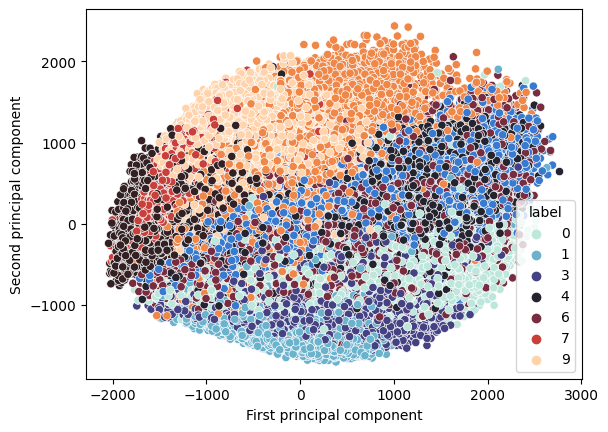

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data = two_dim_data , x = 'x',y = 'y' , hue = 'label', palette= 'icefire')

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.show()

reducing the dimensions using PCA built in function

In [16]:
pca = PCA(n_components=2)

pca_data = pca.fit_transform(X_train)

In [17]:
df1 = pd.DataFrame(data = pca_data, columns=['x', 'y'])
df2 = pd.DataFrame(data = y_train, columns=['label'])
pca_2dim_data = pd.concat([df1, df2], axis = 1)
pca_2dim_data

,x,y,label
0,940.014979,1264.934899,2
1,-1115.990760,984.569965,9
2,1852.613740,400.032947,6
3,823.085923,-592.940376,0
4,1057.325178,-1029.965513,3
...,...,...,...
59995,4.491333,1323.117769,9
59996,-794.379112,-1328.946293,1
59997,556.320825,115.202712,8
59998,374.867626,1546.166453,8


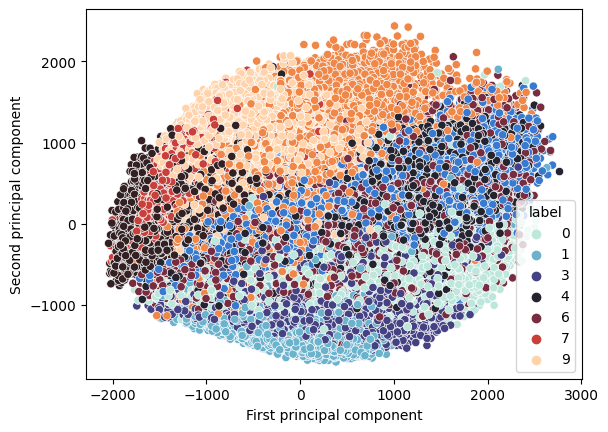

In [18]:
sns.scatterplot(data = pca_2dim_data , x = 'x',y = 'y' , hue = 'label', palette= 'icefire')

plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.show()

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [20]:
pca = PCA(n_components=0.96)
selected_feat_train = pca.fit_transform(X_train)
selected_feat_test = pca.transform(X_test)

In [21]:
selected_feat_train.shape

(60000, 226)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

the result of a build in function was as same as own implementation.
>now we train SVM model with different kernels

In [31]:
# svm_scores = np.zeros(3)                       linear svm took too long so I had to cancel it.
# ker = ['poly', 'rbf', 'linear']
# i=0
# for a in ker:
#     print(a)
#     svm = SVC(kernel=a)
#     score = cross_val_score(svm, selected_feat_train, y_train, cv=5)
#     svm_scores[i] = np.mean(score)
#     i+=1
# print(svm_scores)

svm_scores = np.zeros(2)
ker = ['poly', 'rbf']
i=0
for a in ker:
    print(a)
    svm = SVC(kernel=a)
    score = cross_val_score(svm, selected_feat_train, y_train, cv=5)
    svm_scores[i] = np.mean(score)
    i+=1
print(svm_scores)

poly
rbf
[0.88521667 0.89198333]


In [23]:
svm = SVC(kernel='rbf')
score = cross_val_score(svm, selected_feat_train, y_train, cv=5)
print(score)

[0.89075    0.89283333 0.89683333 0.88841667 0.89108333]


In [27]:
from sklearn.metrics import accuracy_score

In [25]:
svm.fit(selected_feat_train, y_train)
y_predict = svm.predict(selected_feat_test)

acc = accuracy_score(y_test, y_predict)
acc

0.8976

In [26]:
per_metrics = confusion_matrix(y_test, y_predict)
per_metrics

array([[858,   0,  11,  25,   0,   2,  95,   0,   9,   0],
       [  3, 977,   1,  14,   0,   1,   4,   0,   0,   0],
       [  9,   0, 828,  16,  80,   0,  65,   0,   2,   0],
       [ 27,   7,   6, 921,  22,   0,  16,   0,   1,   0],
       [  0,   0,  59,  24, 869,   0,  46,   0,   2,   0],
       [  0,   0,   0,   0,   0, 947,   1,  36,   3,  13],
       [150,   0,  71,  24,  55,   0, 691,   0,   9,   0],
       [  0,   0,   0,   0,   0,  18,   0, 952,   0,  30],
       [  5,   0,   6,   2,   1,   1,   5,   2, 978,   0],
       [  0,   0,   0,   0,   0,  10,   0,  35,   0, 955]], dtype=int64)

In [32]:
from sklearn.metrics import precision_recall_fscore_support

In [27]:
cost_sensitive_measures = precision_recall_fscore_support(y_test, y_predict)
cost_sensitive_measures

(array([0.81558935, 0.99288618, 0.84317719, 0.89766082, 0.84615385,
        0.96731359, 0.74864572, 0.92878049, 0.97410359, 0.95691383]),
 array([0.858, 0.977, 0.828, 0.921, 0.869, 0.947, 0.691, 0.952, 0.978,
        0.955]),
 array([0.83625731, 0.98487903, 0.83551968, 0.90918065, 0.85742477,
        0.95704901, 0.71866875, 0.94024691, 0.9760479 , 0.95595596]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [28]:
svm.fit(selected_feat_train, y_train)
y_predict = svm.predict(selected_feat_train)

acc = accuracy_score(y_train, y_predict)
acc

0.9167833333333333

In [30]:
per_metrics = confusion_matrix(y_train, y_predict)
per_metrics

array([[5383,    2,   57,  131,   10,    2,  387,    0,   27,    1],
       [  12, 5847,    9,  112,    6,    1,   12,    0,    1,    0],
       [  56,    1, 5183,   54,  418,    1,  279,    0,    8,    0],
       [ 112,   10,   34, 5589,  149,    0,   93,    0,   13,    0],
       [   5,    4,  328,  160, 5241,    0,  253,    0,    9,    0],
       [   0,    0,    0,    2,    0, 5830,    0,  133,   11,   24],
       [ 683,    5,  418,  119,  318,    0, 4426,    0,   30,    1],
       [   0,    0,    0,    0,    0,   67,    0, 5811,    5,  117],
       [   9,    1,   15,   24,   16,    5,   28,   11, 5891,    0],
       [   0,    0,    0,    1,    0,   33,    0,  159,    1, 5806]],
      dtype=int64)

In [32]:
cost_sensitive_measures = precision_recall_fscore_support(y_train, y_predict)
cost_sensitive_measures

(array([0.85990415, 0.99608177, 0.85754467, 0.90261628, 0.85108802,
        0.98164674, 0.80795911, 0.95044161, 0.98248833, 0.97596235]),
 array([0.89716667, 0.9745    , 0.86383333, 0.9315    , 0.8735    ,
        0.97166667, 0.73766667, 0.9685    , 0.98183333, 0.96766667]),
 array([0.87814029, 0.9851727 , 0.86067752, 0.91683071, 0.86214838,
        0.97663121, 0.7712145 , 0.95938583, 0.98216072, 0.9717968 ]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [33]:
bayes = GaussianNB()
score = cross_val_score(bayes, selected_feat_train, y_train, cv=5)
print(np.mean(score))

0.7332166666666667


In [35]:
bayes.fit(selected_feat_train, y_train)
y_predict = bayes.predict(selected_feat_test)

acc = accuracy_score(y_test, y_predict)
acc

0.7359

In [36]:
per_metrics = confusion_matrix(y_test, y_predict)
per_metrics

array([[677,  12,  18,  66,   9,  11,  63,   3, 141,   0],
       [  0, 893,   8,  49,   2,   6,  11,   0,  31,   0],
       [ 19,   0, 667,   3, 120,   6,  86,   0,  99,   0],
       [ 34,  71,   6, 723,  29,  24,  33,   0,  80,   0],
       [  8,   4,  83,  32, 702,   6,  83,   0,  82,   0],
       [ 13,   0,  12,   0,   0, 727,  31, 191,  16,  10],
       [154,  14,  94,  41,  81,  26, 463,   0, 127,   0],
       [  3,   0,   0,   0,   0,  88,   6, 835,   3,  65],
       [ 19,   0,  16,   7,  12,  20,  38,  23, 863,   2],
       [  2,   0,   4,   0,   2,  19,  22, 112,  30, 809]], dtype=int64)

In [37]:
cost_sensitive_measures = precision_recall_fscore_support(y_test, y_predict)
cost_sensitive_measures

(array([0.72874058, 0.89839034, 0.7345815 , 0.78501629, 0.73354232,
        0.77920686, 0.55382775, 0.71735395, 0.58627717, 0.91309255]),
 array([0.677, 0.893, 0.667, 0.723, 0.702, 0.727, 0.463, 0.835, 0.863,
        0.809]),
 array([0.70191809, 0.89568706, 0.69916143, 0.75273295, 0.71742463,
        0.75219865, 0.5043573 , 0.77171904, 0.69822006, 0.85790032]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [38]:
bayes.fit(selected_feat_train, y_train)
y_predict = bayes.predict(selected_feat_train)

acc = accuracy_score(y_train, y_predict)
acc

0.73535

In [39]:
per_metrics = confusion_matrix(y_train, y_predict)
per_metrics

array([[4299,   83,  101,  311,   32,   82,  355,    1,  735,    1],
       [  12, 5285,   36,  340,    6,   54,   65,    0,  201,    1],
       [ 121,    6, 3995,   24,  697,   73,  484,    2,  597,    1],
       [ 248,  504,   57, 4220,  195,  129,  221,    2,  424,    0],
       [  26,   24,  565,  244, 4071,   31,  564,    1,  474,    0],
       [  78,    0,   70,    1,    0, 4361,  205, 1104,  129,   52],
       [ 845,   92,  680,  175,  512,  128, 2691,    0,  877,    0],
       [   6,    0,    5,    0,    0,  629,   15, 5035,   15,  295],
       [ 111,    3,   98,   49,  118,  120,  186,  166, 5138,   11],
       [  10,    1,   12,    0,    7,  148,   87,  567,  142, 5026]],
      dtype=int64)

In [40]:
cost_sensitive_measures = precision_recall_fscore_support(y_train, y_predict)
cost_sensitive_measures

(array([0.74687283, 0.88112704, 0.7109806 , 0.78672632, 0.72206456,
        0.75777585, 0.55222655, 0.7320442 , 0.58841044, 0.93298682]),
 array([0.7165    , 0.88083333, 0.66583333, 0.70333333, 0.6785    ,
        0.72683333, 0.4485    , 0.83916667, 0.85633333, 0.83766667]),
 array([0.73137121, 0.88098016, 0.68766675, 0.74269623, 0.69960474,
        0.74198214, 0.49498758, 0.78195372, 0.69752919, 0.88276104]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [41]:
knn_scores = np.zeros(3)
n = [3, 5, 7]
i=0
for a in n:
    print(a)
    KNN = KNeighborsClassifier(n_neighbors= a)
    score = cross_val_score(KNN, selected_feat_train, y_train, cv=5)
    knn_scores[i] = np.mean(score)
    i+=1
print(knn_scores)

3
5
7
[0.85946667 0.86123333 0.85993333]


In [42]:
KNN = KNeighborsClassifier(n_neighbors= 5)
score = cross_val_score(KNN, selected_feat_train, y_train, cv=5)
print(np.mean(score))

0.8612333333333334


In [43]:
KNN.fit(selected_feat_train, y_train)
y_predict = KNN.predict(selected_feat_test)

acc = accuracy_score(y_test, y_predict)
acc

0.8669

In [45]:
per_metrics = confusion_matrix(y_test, y_predict)
per_metrics

array([[866,   1,  15,  12,   6,   0,  92,   2,   6,   0],
       [  6, 968,   5,  14,   1,   0,   6,   0,   0,   0],
       [ 18,   0, 792,  14, 106,   0,  67,   0,   3,   0],
       [ 31,   9,  14, 896,  34,   0,  15,   0,   1,   0],
       [  5,   0,  83,  26, 818,   0,  67,   0,   1,   0],
       [  0,   0,   0,   0,   0, 862,   4,  75,   5,  54],
       [199,   1, 104,  17,  78,   0, 593,   0,   8,   0],
       [  0,   0,   0,   0,   0,   4,   0, 945,   0,  51],
       [  3,   0,  11,   1,   6,   0,   7,   3, 966,   3],
       [  0,   0,   0,   0,   0,   4,   0,  33,   0, 963]], dtype=int64)

In [46]:
cost_sensitive_measures = precision_recall_fscore_support(y_test, y_predict)
cost_sensitive_measures

(array([0.7677305 , 0.98876404, 0.7734375 , 0.91428571, 0.77979028,
        0.9908046 , 0.69682726, 0.89319471, 0.97575758, 0.89915966]),
 array([0.866, 0.968, 0.792, 0.896, 0.818, 0.862, 0.593, 0.945, 0.966,
        0.963]),
 array([0.81390977, 0.97827185, 0.7826087 , 0.90505051, 0.79843826,
        0.92192513, 0.64073474, 0.91836735, 0.97085427, 0.92998551]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [47]:
KNN.fit(selected_feat_train, y_train)
y_predict = KNN.predict(selected_feat_train)

acc = accuracy_score(y_train, y_predict)
acc

0.9045333333333333

In [48]:
per_metrics = confusion_matrix(y_train, y_predict)
per_metrics

array([[5489,    2,   66,   79,   13,    1,  317,    1,   31,    1],
       [  20, 5875,   13,   66,    6,    0,   17,    0,    2,    1],
       [  80,    3, 5205,   40,  405,    0,  260,    1,    5,    1],
       [ 179,   20,   44, 5501,  143,    0,  106,    0,    7,    0],
       [  24,    5,  453,  149, 5043,    0,  315,    0,   11,    0],
       [   3,    0,    0,    2,    0, 5500,    6,  266,    9,  214],
       [ 740,    4,  579,   99,  341,    0, 4205,    0,   31,    1],
       [   0,    0,    0,    0,    0,   13,    0, 5811,    1,  175],
       [  25,    0,   43,   20,   25,    4,   47,   20, 5812,    4],
       [   0,    0,    0,    1,    0,   16,    1,  150,    1, 5831]],
      dtype=int64)

In [49]:
cost_sensitive_measures = precision_recall_fscore_support(y_train, y_predict)
cost_sensitive_measures

(array([0.8367378 , 0.99424607, 0.8129002 , 0.9234514 , 0.8438755 ,
        0.99385616, 0.79730755, 0.92990879, 0.98341794, 0.93625562]),
 array([0.91483333, 0.97916667, 0.8675    , 0.91683333, 0.8405    ,
        0.91666667, 0.70083333, 0.9685    , 0.96866667, 0.97183333]),
 array([0.87404459, 0.98664875, 0.83931307, 0.92013047, 0.84218437,
        0.9537021 , 0.74596417, 0.94881215, 0.97598657, 0.95371279]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [26]:
mlp_scores = np.zeros(5)
layers = [75, 100, (75, 150), (100, 150), (200, 200)]
# number_of_neurons = []
# learning_rate = []
# activation = []
# num_epochs = []
i=0
for l in layers:               
    print(i)
    mlp = MLPClassifier(hidden_layer_sizes= l)
    score = cross_val_score(mlp, selected_feat_train, y_train, cv=5)
    mlp_scores[i] = np.mean(score)
    i+=1
print(mlp_scores)

0
1
2
3
4
[0.86301667 0.86581667 0.86006667 0.8639     0.87345   ]


In [23]:
learning_rate = ['constant', 'invscaling', 'adaptive']
mlp_scores = np.zeros(3)
i=0
for r in learning_rate:               
    print(i)
    mlp = MLPClassifier(hidden_layer_sizes= (150, 150), learning_rate= r)
    score = cross_val_score(mlp, selected_feat_train, y_train, cv=5)
    mlp_scores[i] = np.mean(score)
    i+=1
print(mlp_scores)

0
1
2
[0.86901667 0.86971667 0.86851667]


In [23]:
activation = ['identity', 'tanh', 'relu'] #I got a warning on 'logistic'
mlp_scores = np.zeros(3)
i=0
for a in activation:               
    print(i)
    mlp = MLPClassifier(hidden_layer_sizes= (150, 150), learning_rate= 'invscaling', activation= a)
    score = cross_val_score(mlp, selected_feat_train, y_train, cv=5)
    mlp_scores[i] = np.mean(score)
    i+=1
print(mlp_scores)

0
1
2
[0.8422     0.86386667 0.8677    ]


In [24]:
num_epochs = [150, 200, 250]
mlp_scores = np.zeros(3)
i=0
for e in num_epochs:               
    print(i)
    mlp = MLPClassifier(hidden_layer_sizes= (150, 150), learning_rate= 'invscaling' , activation= 'relu', max_iter= e)
    score = cross_val_score(mlp, selected_feat_train, y_train, cv=5)
    mlp_scores[i] = np.mean(score)
    i+=1
print(mlp_scores)

0
1
2
[0.86968333 0.86671667 0.86923333]


In [28]:
mlp = MLPClassifier(hidden_layer_sizes= (150, 150), learning_rate= 'invscaling' , activation='relu' , max_iter= 150)
score = cross_val_score(mlp, selected_feat_train, y_train, cv=5)
print(np.mean(score))

0.8686166666666665


In [29]:
mlp.fit(selected_feat_train, y_train)
y_predict = mlp.predict(selected_feat_test)

acc = accuracy_score(y_test, y_predict)
acc

0.8746

In [30]:
per_metrics = confusion_matrix(y_test, y_predict)
per_metrics

array([[861,   3,  26,  27,   3,   1,  72,   1,   6,   0],
       [  1, 988,   2,   6,   0,   0,   3,   0,   0,   0],
       [ 32,   0, 831,  22,  66,   1,  46,   0,   2,   0],
       [ 34,  14,   8, 894,  24,   2,  22,   0,   2,   0],
       [  5,   3, 126,  38, 773,   1,  53,   0,   1,   0],
       [  4,   2,   1,   3,   0, 931,   3,  34,   6,  16],
       [156,   4, 105,  47,  66,   0, 611,   0,  11,   0],
       [  1,   0,   0,   1,   0,  11,   0, 962,   0,  25],
       [ 10,   1,   5,   7,   3,   5,   7,   3, 958,   1],
       [  0,   0,   0,   0,   0,   9,   0,  53,   1, 937]], dtype=int64)

In [33]:
cost_sensitive_measures = precision_recall_fscore_support(y_test, y_predict)
cost_sensitive_measures

(array([0.7798913 , 0.97339901, 0.75271739, 0.85550239, 0.82673797,
        0.96878252, 0.74785802, 0.91358025, 0.97061803, 0.95709908]),
 array([0.861, 0.988, 0.831, 0.894, 0.773, 0.931, 0.611, 0.962, 0.958,
        0.937]),
 array([0.81844106, 0.98064516, 0.78992395, 0.87432763, 0.79896641,
        0.94951555, 0.67253715, 0.93716512, 0.96426774, 0.9469429 ]),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [34]:
mlp.fit(selected_feat_train, y_train)
y_predict = mlp.predict(selected_feat_train)

acc = accuracy_score(y_train, y_predict)
acc

0.98775

In [35]:
per_metrics = confusion_matrix(y_train, y_predict)
per_metrics

array([[5960,    0,    3,    8,    1,    1,   26,    0,    1,    0],
       [  10, 5971,    0,   11,    2,    1,    2,    0,    3,    0],
       [  19,    1, 5939,    3,   14,    0,   23,    0,    1,    0],
       [  22,    3,    7, 5950,    5,    0,    9,    1,    3,    0],
       [   2,    0,  119,   66, 5777,    0,   32,    0,    4,    0],
       [   0,    0,    0,    0,    0, 5967,    1,   27,    0,    5],
       [ 103,    0,   60,   13,   28,    0, 5786,    0,    9,    1],
       [   1,    0,    1,    0,    0,    2,    0, 5984,    0,   12],
       [   1,    0,    0,    0,    0,    6,    0,    4, 5989,    0],
       [   0,    0,    0,    0,    0,    8,    0,   50,    0, 5942]],
      dtype=int64)

In [36]:
cost_sensitive_measures = precision_recall_fscore_support(y_train, y_predict)
cost_sensitive_measures

(array([0.97417457, 0.99933054, 0.96899984, 0.98330854, 0.99141926,
        0.99699248, 0.98418098, 0.98648203, 0.99650582, 0.99697987]),
 array([0.99333333, 0.99516667, 0.98983333, 0.99166667, 0.96283333,
        0.9945    , 0.96433333, 0.99733333, 0.99816667, 0.99033333]),
 array([0.98366067, 0.99724426, 0.9793058 , 0.98746992, 0.97691722,
        0.99574468, 0.97415607, 0.991878  , 0.99733555, 0.99364548]),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))